# Heart Disease Prediction
- Author: Hasnain Yaqoob
- Dataset: [UCI Heart Disease Project](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci)
- Profiles: 
    - Kaggle:[Hasnain Yaqoob](https://www.kaggle.com/hasnainyaqooob)
    - LinkedIn:[Hasnain Yaqoob](https://www.linkedin.com/in/hasnainyaqoob)
    - GitHub:[Hasnain Yaqoob](https://github.com/hasnainyaqub)

### About Dataset

#### Context  
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.



#### Content  
**Column Descriptions**:  
- `id`: Unique id for each patient  
- `age`: Age of the patient in years  
- `origin`: Place of study  
- `sex`: Male/Female  
- `cp`: Chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
- `trestbps`: Resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))  
- `chol`: Serum cholesterol in mg/dl  
- `fbs`: If fasting blood sugar > 120 mg/dl  
- `restecg`: Resting electrocardiographic results  
  - Values: [normal, stt abnormality, lv hypertrophy]  
- `thalach`: Maximum heart rate achieved  
- `exang`: Exercise-induced angina (True/False)  
- `oldpeak`: ST depression induced by exercise relative to rest  
- `slope`: The slope of the peak exercise ST segment  
- `ca`: Number of major vessels (0-3) colored by fluoroscopy  
- `thal`: [normal; fixed defect; reversible defect]  
- `num`: The predicted attribute  



#### Acknowledgements  
**Creators**:  
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.  
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.  
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.  
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.  



#### Relevant Papers:  
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. *American Journal of Cardiology, 64, 304--310*.  
- **Web Link**:  
  David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."  
- **Web Link**:  
  Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. *Artificial Intelligence, 40, 11--61*.  



#### Citation Request:  
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:  
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.  
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.  
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.  
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Aims and Objectives: 
We will fill this after doing some exploratory data analysis.(EDA)

### Import Libraries
let's start the project by importing the libraries that we will need.


In [1]:
# import libraries
# 1.data handling libraries
import pandas as pd 
import numpy as np
# 2.visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go
# 3.machine learning libraries
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
    # 3.1.for classification 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier , RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
    # 3.2.matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset from csv file.


In [2]:
# 1. load the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)
### Explore each Column of the dataset

In [3]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# data shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 920
Number of columns: 16


In [5]:
# id column 
df['id'].min(), df['id'].max()

(1, 920)

In [6]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

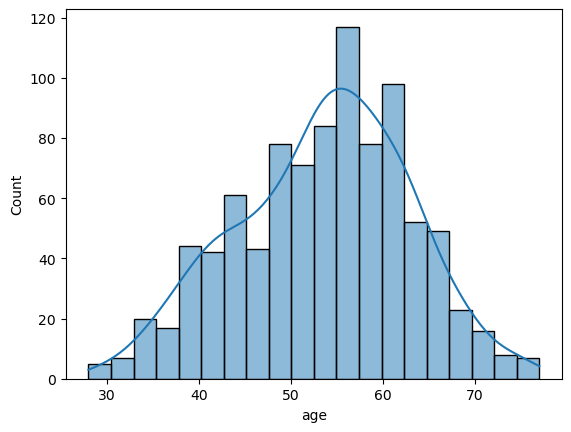

In [7]:
# draw histogram for age column 
sns.histplot(df['age'], bins=20, kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


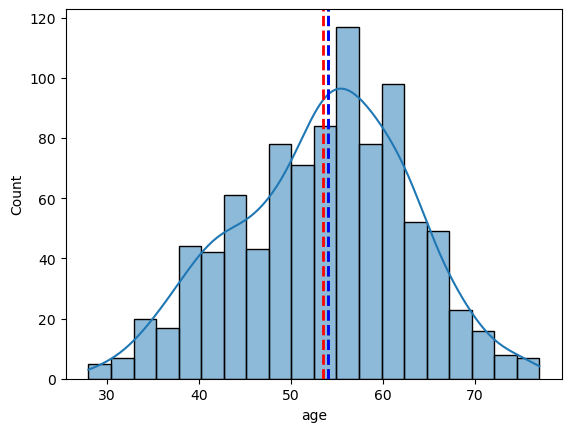

In [8]:
# plot the mean, median, and mode of the age column using sns 
sns.histplot(df['age'], bins=20, kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['age'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['age'].mode()[0], color='b', linestyle='dashed', linewidth=2)

# print the mean, median, and mode of the age column
print(f"Mean: {df['age'].mean()}")
print(f"Median: {df['age'].median()}")
print(f"Mode: {df['age'].mode()[0]}")

let's explore the gender based distribution of the dataset for age column.

In [9]:
# plot the histogram for age column using plotly and coloring this by sex
fig = px.histogram(df, x='age', color='sex')
fig.update_layout(title='Age Distribution by Sex', xaxis_title='Age', yaxis_title='Count')
fig.show()

In [10]:
#  find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
male = 726
female = 194
total = male + female  # 920

male_percentage = (male / total) * 100
female_percentage = (female / total) * 100

print(f"Percentage of males: {male_percentage:.2f}%")
print(f"Percentage of females: {female_percentage:.2f}%")
# difference 
difference_percentage = ((male - female) / female) * 100
print(f"Males are {difference_percentage:.2f}% more than females.")

Percentage of males: 78.91%
Percentage of females: 21.09%
Males are 274.23% more than females.


In [12]:
# find the value count of age column grouped by sex
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [13]:
 # let's deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# find the unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [15]:
# # plot the countplot for dataset column
# sns.countplot(x='dataset', data=df , hue='sex')
# plt.title('Count of Dataset')
# plt.xlabel('Dataset')
# plt.ylabel('Count')
# plt.show()
# plot same countplot using plotly
fig = px.histogram(df, x='dataset', color='sex')
fig.update_layout(title='Count of Dataset', xaxis_title='Dataset', yaxis_title='Count')
fig.show()

# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [16]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(df, x='age', color='dataset')
fig.update_layout(title='Age Distribution by Dataset', xaxis_title='Age', yaxis_title='Count')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(df.groupby('dataset')['age'].agg(['mean', 'median', pd.Series.mode, 'min', 'max']))


                    mean  median      mode  min  max
dataset                                             
Cleveland      54.351974    55.5        58   28   77
Hungary        47.894198    49.0        54   29   66
Switzerland    55.317073    56.0        61   32   74
VA Long Beach  59.350000    60.0  [62, 63]   35   77


### Let's explore the CP (Chest Pain) column


In [17]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

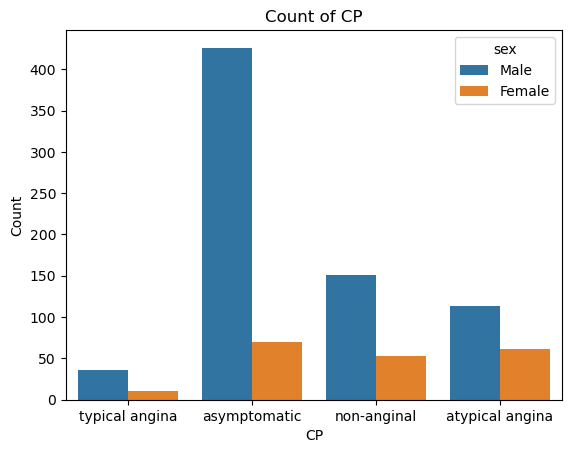

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64


In [18]:
# count plot for cp column by sex column
sns.countplot(x='cp', data=df , hue='sex')
plt.title('Count of CP')
plt.xlabel('CP')
plt.ylabel('Count')
plt.show()

# print the values count of cp column grouped
print(df.groupby('sex')['cp'].value_counts())

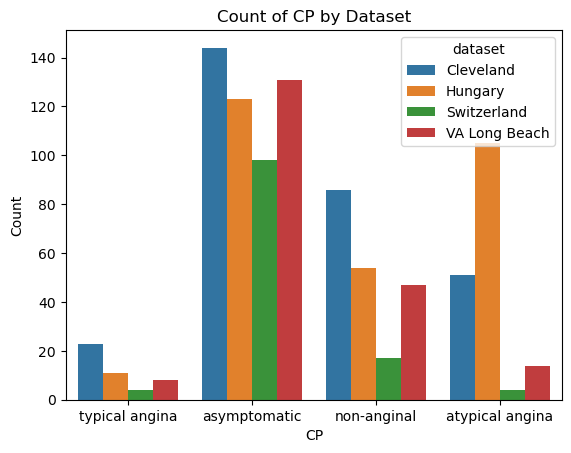

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64


In [19]:
# count plot of cp column by dataset column
sns.countplot(x='cp', data=df , hue='dataset')
plt.title('Count of CP by Dataset')
plt.xlabel('CP')
plt.ylabel('Count')
plt.show()

# print the values count of cp column grouped by dataset column
print(df.groupby('dataset')['cp'].value_counts())

In [20]:
# draw the plot of age column grouped by cp column
fig = px.histogram(df, x='age', color='cp')
fig.update_layout(title='Age Distribution by CP', xaxis_title='Age', yaxis_title='Count')
fig.show()

# print the mean median and mode of age column grouped by cp column
print(df.groupby('cp')['age'].agg(['mean', 'median', pd.Series.mode, 'min', 'max']))

                      mean  median      mode  min  max
cp                                                    
asymptomatic     54.959677    56.0        57   31   77
atypical angina  49.241379    50.5        54   28   74
non-anginal      53.333333    53.5  [51, 54]   33   76
typical angina   54.826087    59.0        62   30   74


### Let's explore the trestbps (Resting Blood Pressure) column.
- The normal range for resting blood pressure is **120/80 mm Hg**.
    - If the blood pressure is above **130/80 mm Hg**, the person is considered to have high blood pressure.
    - If the blood pressure is below **120/80 mm Hg**, the person is considered to have low blood pressure.

In [21]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

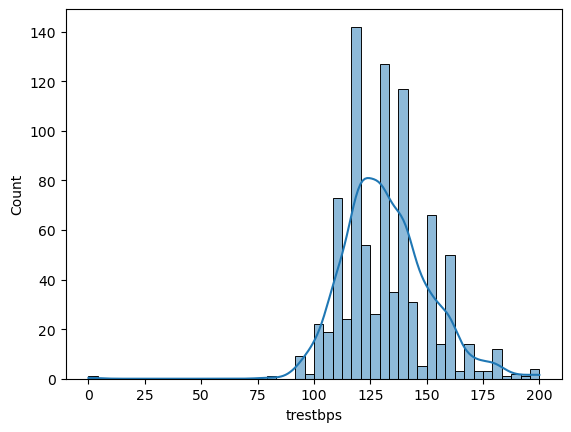

In [22]:
# draw the histogram of trestbps column
sns.histplot(df['trestbps'],  kde=True)

----------
# <span style="color:#34ebd8;">Dealing with Missing Values</span>


In [23]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [24]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [25]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [26]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [27]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
        pass
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 12.97011560693642 

R2 = 0.10405415902490978 

Missing Values chol : 3.26%
MAE = 45.52280898876404 

R2 = 0.6729742569591564 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.543468208092484 

R2 = 0.33691275038107205 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5604360465116279 

R2 = 0.4103471423230274 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 64.23 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [28]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

----------
# <span style="color:#34ebd8;">Dealing with Outliers</span>


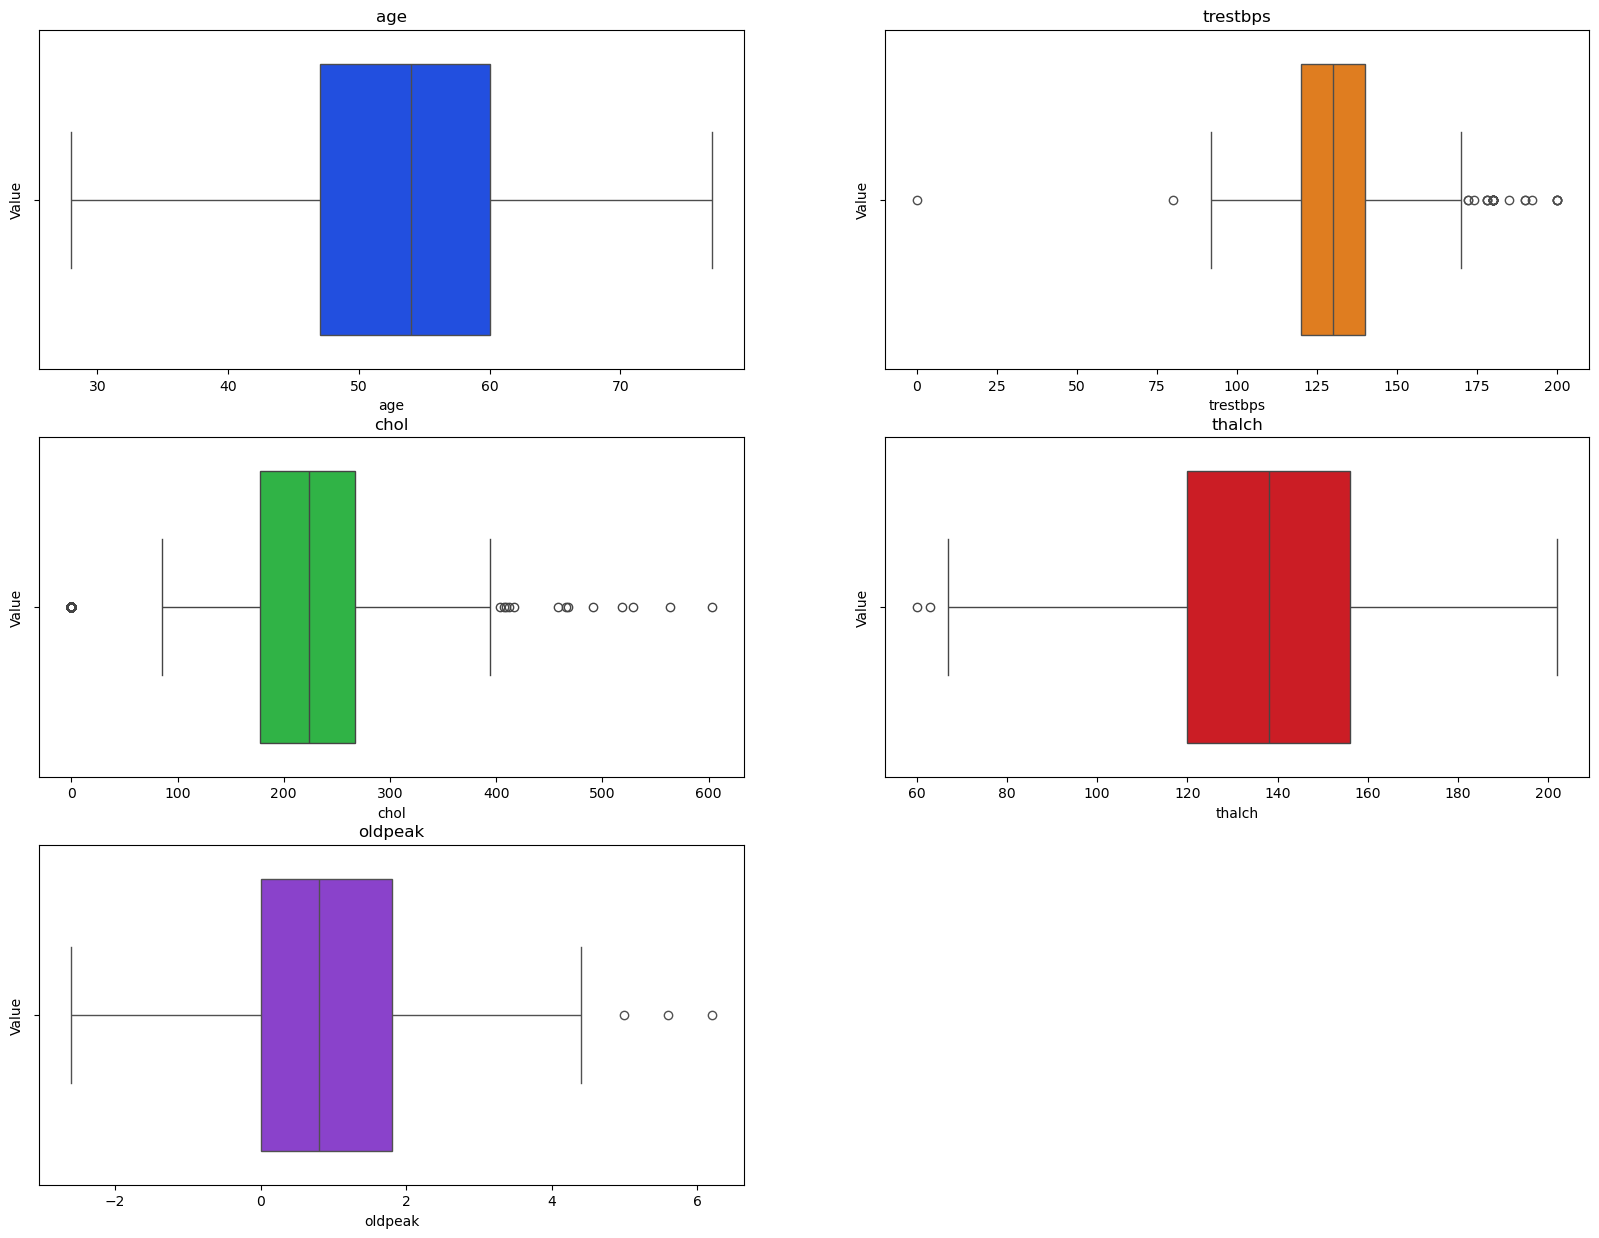

In [29]:
# create box plot for all numerical columns using loop and subplot
# 1. get the numerical columns 
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id','num','ca'])
plt.figure(figsize=(20, 15))
colors = sns.color_palette('bright', len(num_cols))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Value')

plt.show()

In [30]:
# print the row from df where trestbps values is 0
df[df['trestbps'] == 0]
# remove the row from df where trestbps values is 0
df = df[df['trestbps'] != 0]

In [31]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id','num','ca']).columns
colors = px.colors.qualitative.Plotly

fig = sp.make_subplots(rows=3, cols=2, subplot_titles=num_cols)

for i, col in enumerate(num_cols):
    row = i // 2 + 1
    col_num = i % 2 + 1
    fig.add_trace(go.Box(x=df[col], name=col, marker_color=colors[i % len(colors)], orientation='h'), row=row, col=col_num)

fig.update_layout(height=1000, width=1300, title_text="Box Plots of Numerical Columns")
fig.show()

----------
# **<span style="color:#34ebd8;">Machine Learning</span>**

In [32]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [33]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

- num
    - target [0=no heart disease; 1,2,3,4 = stages of heart disease ]
- The target Column is `num` which is predicted attribute. We will use this column to predict the heart disease.
- The unique values of `num` are 0, 1, 2, 3, 4 which means that there are 5 different stages of heart disease.
* **0 = no heart disease**
* **1 = heart disease stage 1**
* **2 = heart disease stage 2**
* **3 = heart disease stage 3**
* **4 = heart disease stage 4**

In [34]:
df.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


In [35]:
bins=[0,1,2,3,4]
labels=['No-Heart-Disease', 'Mild-Heart-Disease', 'Moderate-Heart-Disease', 'Severe-Heart-Disease']
df['num_bins']=pd.cut(df['num'], bins=bins, labels=labels, include_lowest=True)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,No-Heart-Disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Mild-Heart-Disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,No-Heart-Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,No-Heart-Disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,No-Heart-Disease


In [36]:
#Encode data
label_encoders ={}
for col in df[['sex', 'dataset', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs','num_bins' ]]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_bins
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0,2
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2,0
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1,2
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0,2
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0,2


### Models 

In [37]:
from sklearn.linear_model import Lasso, RidgeClassifier
models = {
    
  'Logistic Regression': (LogisticRegression(),
    {
        'model__C': [1, 10],
        'model__penalty': ['l2'],
        'model__max_iter': [500],
    }),

'Support Vector Machine': (SVC(),
    {
        'model__C': [1, 10],
        'model__kernel': ['rbf'],
    }),

   'AdaBoost Classifier': (AdaBoostClassifier(),
        {
            'model__n_estimators': [10, 50, 100]
        }),

  'XGBoost Classifier': (XGBClassifier(),
    {
        'model__max_depth': [None ,2],
        'model__learning_rate': [0.1, 0.2],
        'model__n_estimators': [50,70,85, 100],
        'model__gamma': [0, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0],
        'model__reg_lambda': [1],
    }),
    
  'Decision Tree Classifier': (DecisionTreeClassifier(),
    {
        'model__criterion': ['gini', 'entropy'],   
        'model__max_depth': [None, 3, 5],       
        'model__max_features': [None, 'sqrt', 'log2']  
    }),
    
'Random Forest Classifier': (RandomForestClassifier(),
    {
        'model__n_estimators': [10, 50],
        'model__max_depth': [None, 3, 4],
        'model__min_samples_split': [2, 4],
        'model__min_samples_leaf': [1, 2],
    }),
    
  'K-Nearest Neighbors': (KNeighborsClassifier(),
    {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),

'Gradient Boosting Classifier': (GradientBoostingClassifier(),
    {
        'model__n_estimators': [50, 100,],
        'model__learning_rate': [0.1, 0.2],
        'model__max_depth': [3, 4],
        'model__max_features': ['sqrt', 'log2', None]
    }),
    
   'CatBoost Classifier': (CatBoostClassifier(verbose=0),
        {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }),

    'GaussianNB': (GaussianNB(),
        {})
   
}

In [38]:
# Define the features of x and y
X = df.drop(['num'], axis=1)
y = df['num']

In [39]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

u , c = np.unique(y_train, return_counts=True)
d = {k:v for (k,v) in zip(u,c)}
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (643, 16)
Number transactions y_train dataset:  (643,)
Number transactions X_test dataset:  (276, 16)
Number transactions y_test dataset:  (276,)


In [40]:
%%time
model_scores = []
best_accuracy = 0
best_estimator = None
best_param = {}

for name, (model, param) in models.items():
    feature_selection = SelectKBest(mutual_info_classif, k=10)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', feature_selection),
        ('model', model)
    ])
    

    grid_search = GridSearchCV(
        pipeline,
        param,
        cv = 5, 
        scoring ='accuracy',  
        verbose = 0,
        n_jobs = -1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store performance metrics for the current model
    model_scores.append({
        'Model': name,
        "Cross-validation Accuracy" : grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:  
        best_accuracy = accuracy
        best_estimator = grid_search.best_estimator_  
        best_param = grid_search.best_params_  
        
sorted_models = sorted(model_scores, key=lambda x: x['Accuracy'], reverse=True)       
metrics = pd.DataFrame(sorted_models)
metrics

CPU times: user 7.16 s, sys: 503 ms, total: 7.67 s
Wall time: 59 s


,Model,Cross-validation Accuracy,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.895833,0.902174,0.902510,0.902174,0.902044
1,XGBoost Classifier,0.917611,0.894928,0.894695,0.894928,0.894671
2,Gradient Boosting Classifier,0.905160,0.887681,0.887482,0.887681,0.887195
3,CatBoost Classifier,0.906747,0.876812,0.876812,0.876812,0.876812
4,Decision Tree Classifier,0.891158,0.873188,0.887726,0.873188,0.868102
5,Logistic Regression,0.866364,0.862319,0.862149,0.862319,0.861277
6,Support Vector Machine,0.883370,0.862319,0.862524,0.862319,0.861606
7,GaussianNB,0.835247,0.851449,0.850888,0.851449,0.850806
8,K-Nearest Neighbors,0.782280,0.782609,0.784255,0.782609,0.778383
9,AdaBoost Classifier,0.723183,0.684783,0.503996,0.684783,0.569890


In [41]:
model = best_estimator.steps[-1][1]
model_name = model.__class__.__name__

In [42]:
print(f'Best model: {model_name}  Accuracy: {best_accuracy}\n \n And its Best parameters:')
best_param 


Best model: RandomForestClassifier  Accuracy: 0.9021739130434783
 
 And its Best parameters:


{'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 50}

In [43]:
# Get the params of the best estimator
best_model_parameters = best_estimator.steps[-1][1].get_params()
print(f'Best Model Parameters for {model_name}')
for params, value in best_model_parameters.items():
    print(f" - {params}: {value}")

Best Model Parameters for RandomForestClassifier
 - bootstrap: True
 - ccp_alpha: 0.0
 - class_weight: None
 - criterion: gini
 - max_depth: None
 - max_features: sqrt
 - max_leaf_nodes: None
 - max_samples: None
 - min_impurity_decrease: 0.0
 - min_samples_leaf: 1
 - min_samples_split: 2
 - min_weight_fraction_leaf: 0.0
 - monotonic_cst: None
 - n_estimators: 50
 - n_jobs: None
 - oob_score: False
 - random_state: None
 - verbose: 0
 - warm_start: False


In [44]:
single_instance = X_train.sample(1, random_state=42)

# use the best estimator to predict the target variable
y_pred = best_estimator.predict(single_instance)

print('Prediction'.upper())
y_pred[0]

PREDICTION


0

In [45]:
adas = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None)
adas.fit(X_train,y_train)
y_pred = adas.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       117
           1       0.93      0.72      0.81        87
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00         5

    accuracy                           0.89       276
   macro avg       0.95      0.94      0.94       276
weighted avg       0.90      0.89      0.89       276



### Best Model and its test score 

In [46]:
print(f'Best model: {model_name}  Accuracy: {best_accuracy}')
print(f"Training set score: {adas.score(X_train, y_train):.2f}")
print(f"Test set score: {adas.score(X_test, y_test):.2f}")

Best model: RandomForestClassifier  Accuracy: 0.9021739130434783
Training set score: 0.91
Test set score: 0.89


- Achieved a strong accuracy of approximately 89% on the test data, demonstrating reliable predictive capabilities. The model exhibits consistent performance across both training and test datasets.

In [47]:
#Inverse encoding
for col in df[['sex', 'dataset', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs','num_bins' ]]:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    
    # Inverse transform the data
    df[col] = le.inverse_transform(df[col]).astype('O')
    
# check the first 5 rows of the complete dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,No-Heart-Disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Mild-Heart-Disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,No-Heart-Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,No-Heart-Disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,No-Heart-Disease


In [48]:
#save model
import pickle
                        
# pickle.dump(model_name, open('best_model_for_heart_disease.pkl', 'wb'))